**According to Jessica Simpson,"LAUGH A LOT. IT BURNS A LOT OF CALORIES"**

* In this notebook, let's predict ✍ the calories burnt 🚴 using XGBoost 🏋️‍♀️ & let's have a healthy & a happier life👩.

# **DataSet Story**
* User_ID : Unique identifier for each individual in the datasets
* Gender: Gender of the individual (e.g., 'Male' or 'Female').* 
Age: Age of the individual.iv Height: Height of the individua
* Weight: Weight of the individual.
* Duration: Duration of the physical activity or exercise session.
* Heart_Rate: Heart rate of the individual during the activity.
* Body_Temp: Body temperature of the individual.
* Calories: Calories burnt by an individual.   
 y.*.**
**.**

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ydata_profiling as pp
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBRegressor
from sklearn import metrics

**LOADING THE DATA & PREPROCESSING THE DATA**

In [2]:
calories_data = pd.read_csv("calories.csv")

In [3]:
calories_data.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [4]:
exercise_data = pd.read_csv("exercise.csv")

In [5]:
exercise_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

**Inference:**

* We can observe an Indirect relationship between heart rate & body temperature with respect to the excercise the individual does.

**COMBINING THE EXCERCISE DATA & CALORIES DATA**

In [6]:
combined_data = pd.concat([exercise_data,calories_data['Calories']], axis=1)

In [7]:
combined_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [8]:
#checking the number of rows & columns
combined_data.shape

(15000, 9)

**Hence our combined_data has 15,000 people with 9 different features**

In [9]:
#getting the information about the data most importantly to know about any missing values
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
#checking the missing values
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**ANALYSING THE DATA**

In [11]:
#To get stastical measures about the data
combined_data.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

**Important inference**
* Heart rate & body temperature is more when the person is doing excercise

In [12]:
pp.ProfileReport(combined_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**VISUALIZATION OF DATA**

In [13]:
sns.set()

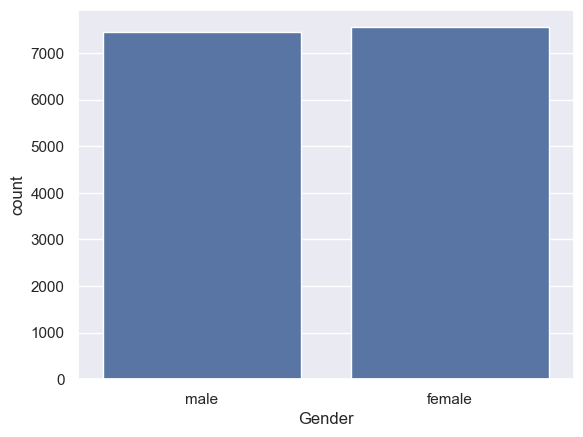

In [14]:
%matplotlib inline
sns.countplot(data=combined_data, x='Gender')

# Show the plot
plt.show()

**From the above plot, we can observe that the data is evenly distributed(almost 7000) for both males and females.**

<Axes: xlabel='Age', ylabel='Density'>

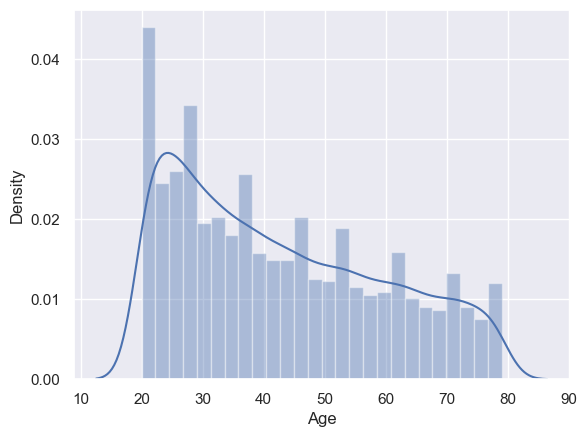

In [15]:
#inorder to find the distribution of age column
sns.distplot(combined_data['Age'])

**From the above plot, we can observe that the Age column has the mean value of 42 and the data is positively skewed & most of the datapoints are in between 20 to 50.**
    

<Axes: xlabel='Height', ylabel='Density'>

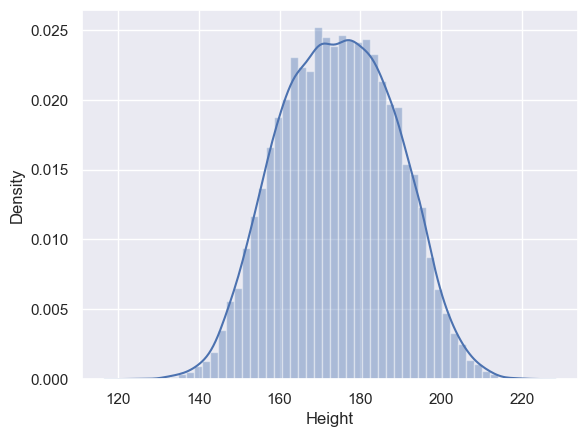

In [16]:
#inorder to find the distribution of height column
sns.distplot(combined_data['Height'])

**Hence,from the above plot we can observe that the height data is normally distributed with mean of 174cm.**

<Axes: xlabel='Weight', ylabel='Density'>

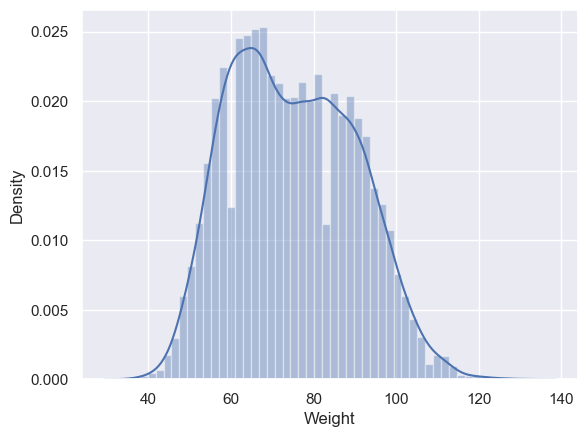

In [17]:
#inorder to find the distribution of weight column
sns.distplot(combined_data['Weight'])

**Hence,from the above plot we can observe that the weight data is also normally distributed with mean of 74 kg**

<Axes: xlabel='Duration', ylabel='Density'>

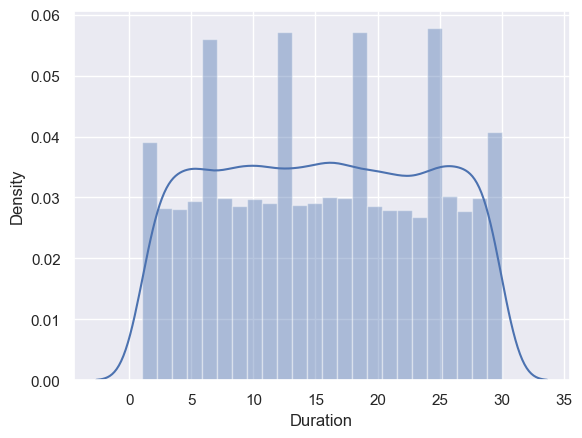

In [18]:
sns.distplot(combined_data['Duration'])

**Hence, from the above plot we can observe that the duration data is a low peaked data with mean of 15mins**

<Axes: xlabel='Heart_Rate', ylabel='Density'>

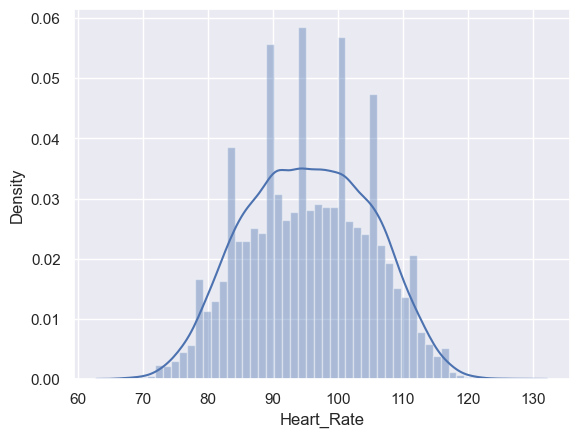

In [19]:
sns.distplot(combined_data['Heart_Rate'])

**Hence,from the above plot we can observe that the heart rate column is normally distributed with mean of 95 heart beats with several outliers.**

<Axes: xlabel='Body_Temp', ylabel='Density'>

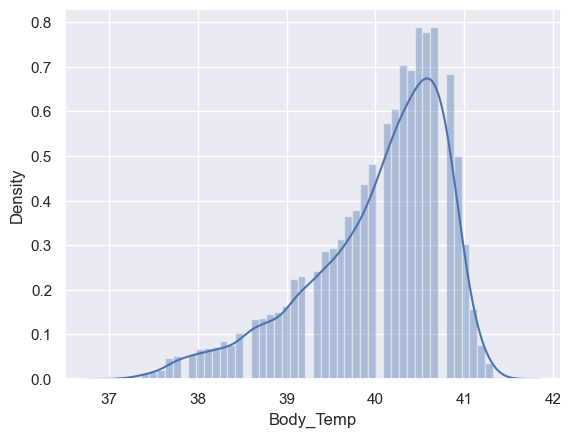

In [20]:
sns.distplot(combined_data['Body_Temp'])

**Hence,from the above plot we can observe that the temperature column is negatively skewed with mean of 40.**

**TO FIND THE CORRELATION IN THE DATA**

Duration & calories are directly proportional=positively correlated


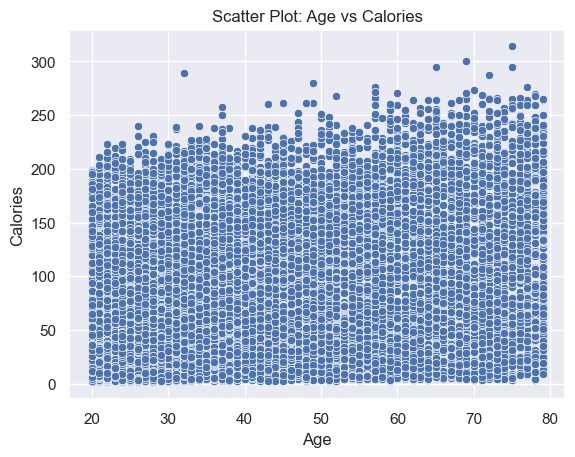

In [21]:
# Scatter plot for Age vs Calories
sns.scatterplot(x='Age', y='Calories', data=combined_data)
plt.title('Scatter Plot: Age vs Calories')
plt.show()

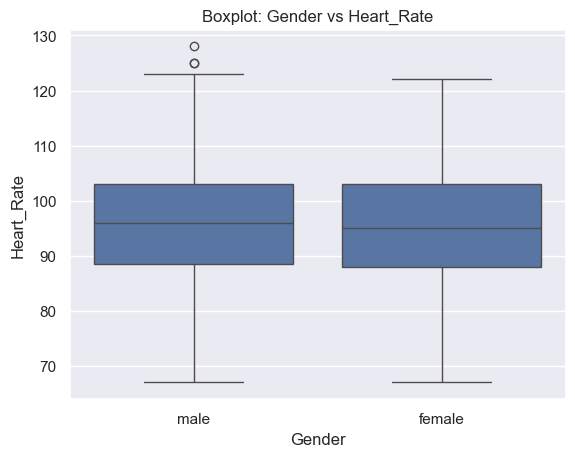

In [22]:
sns.boxplot(x='Gender',y='Heart_Rate',data=combined_data)
plt.title("Boxplot: Gender vs Heart_Rate")
plt.show()

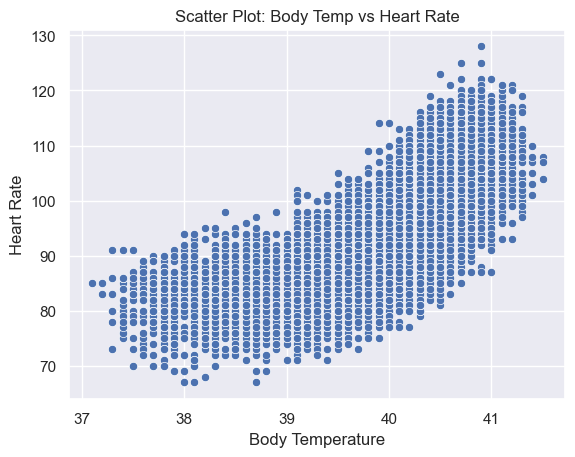

In [23]:
# Scatter plot for Body Temp vs Heart Rate
sns.scatterplot(x='Body_Temp', y='Heart_Rate', data=combined_data)
plt.title('Scatter Plot: Body Temp vs Heart Rate')
plt.xlabel('Body Temperature')
plt.ylabel('Heart Rate')
plt.show()

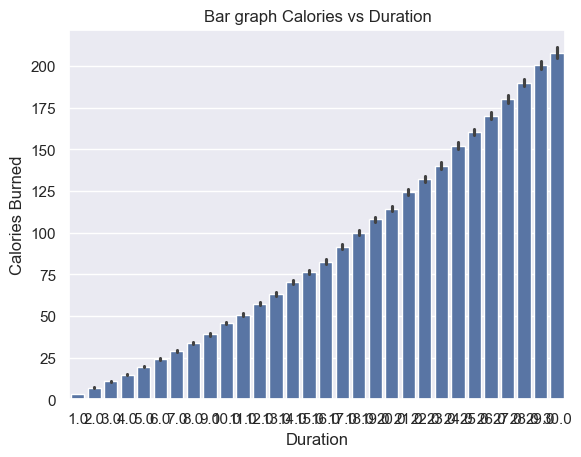

In [24]:
# Bar plot for Duration vs Calories
sns.barplot(x='Duration',y='Calories',data=combined_data)
plt.title("Bar graph Calories vs Duration")
plt.xlabel('Duration')
plt.ylabel('Calories Burned')
plt.show()

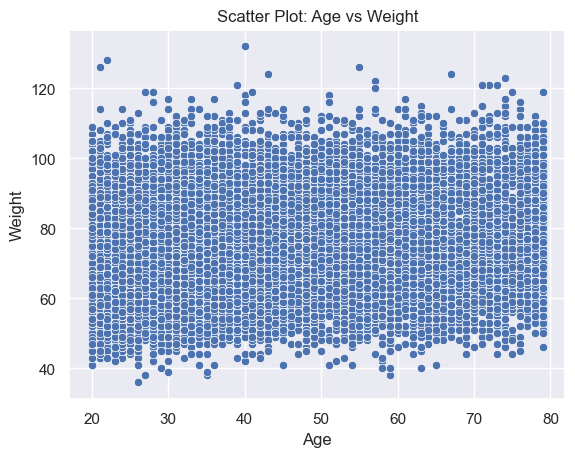

In [25]:
# Scatter plot for Age vs Weight
sns.scatterplot(x='Age', y='Weight', data=combined_data)
plt.title('Scatter Plot: Age vs Weight')
plt.show()

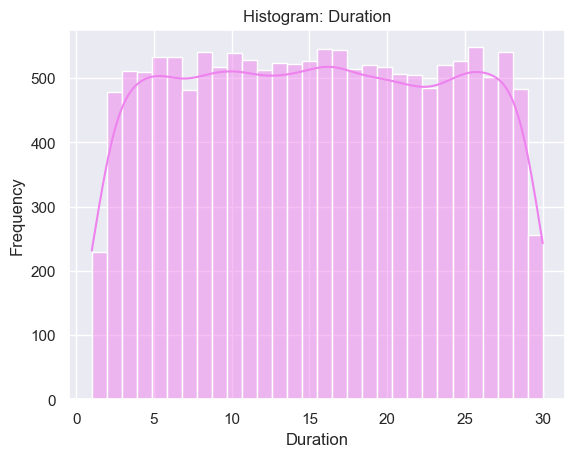

In [26]:
# Histogram for Duration
sns.histplot(combined_data['Duration'], bins=30, kde=True, color='violet')
plt.title('Histogram: Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

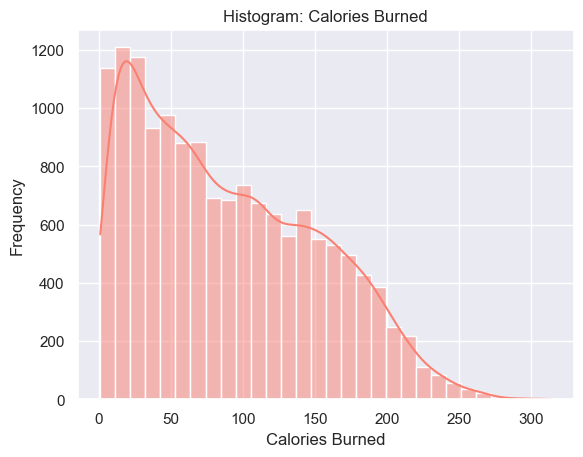

In [27]:
# Histogram for Calories Burned
sns.histplot(combined_data['Calories'], bins=30, kde=True, color='salmon')
plt.title('Histogram: Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()

In [28]:
#converting gender string data type to float
gender_mapping={'male':0,'female':1}

combined_data["Gender"]=combined_data["Gender"].map(gender_mapping)
combined_data

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1      14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2      11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3      16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4      17771927       1   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082       1   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577       1   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188       1   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037       0   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526       0   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0         231.0  
1          66.0  
2          26.0  
3          71.0  
4          35.0  
...         ...  
14995      45.0  
14996      23.0  
14997      75.0  
14998      11.0  
14999      98.0  

[15000 rows x 9 columns]

In [29]:
# df_numeric = combined_data[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']].copy()
# correlation_matrix = df_numeric.corr()
correlation = combined_data[['User_ID','Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp']].corr()

**Construction of heat map for the understanding of correlation**

<Axes: >

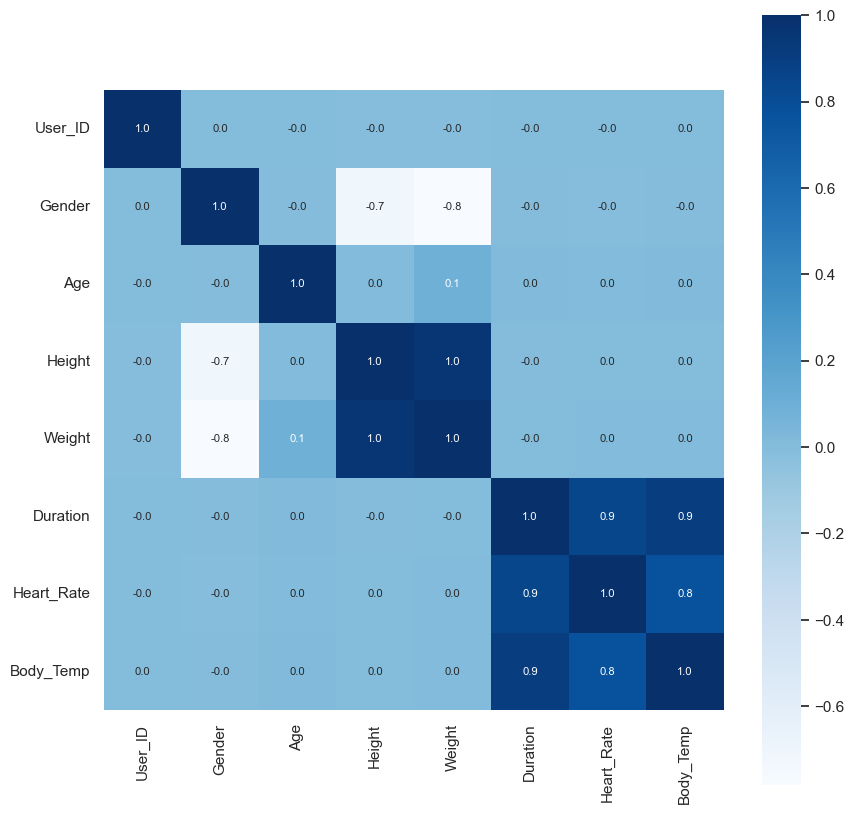

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**CONVERSION OF TEXT DATA TO NUMERICAL VALUES**

In [31]:
#combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
combined_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

**SEPARATION OF FEATURES AND TARGET**

In [32]:
X=combined_data.drop(['User_ID','Calories'],axis=1)
Y=combined_data['Calories']

In [33]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [34]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


**SPLIT THE DATA INTO TRAINING DATA & TEST DATA**

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Hence, we can observe that 
* X contains the orignal amount of data which is 15000
* X_train contains 80% of the data which is 12000
* X_test contains 20% of the data which is 3000

**MODEL IMPLEMENTATION : XGBoost Regressor**

In [37]:
#loading the model
model = XGBRegressor()

In [38]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**EVALUATION**

Evaluation is done by test data

**PREDICTION OF THE DATA**

In [39]:
calories_burnt_prediction = model.predict(X_test)

In [40]:
print(calories_burnt_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


**MEAN ABSOLUTE ERROR**

In [41]:
MAE = metrics.mean_absolute_error(Y_test, calories_burnt_prediction)

In [42]:
print("Mean Absolute Error = ",MAE)

Mean Absolute Error =  1.4833678883314132


**BUILDING A PREDICTIVE SYSTEM**
* Building a predictive system inorder to find the calories burnt for the first individual from the dataset

In [43]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8,231)

print("The calories burnt for the first individual in the dataset is predicted as ", calories_burnt_prediction[0])

The calories burnt for the first individual in the dataset is predicted as  125.58828


In [44]:
print("Thus we have successfully predicted the calories burnt using XGBoost")

Thus we have successfully predicted the calories burnt using XGBoost


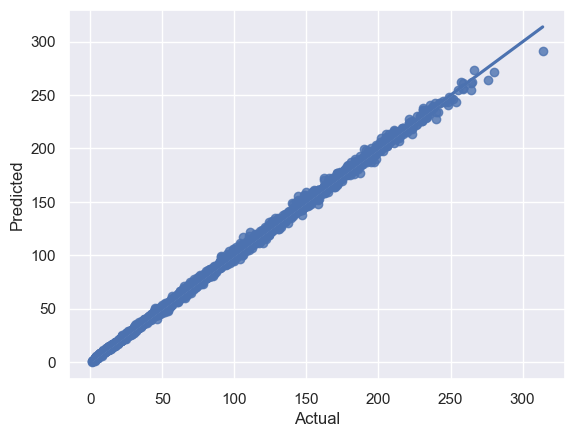

In [45]:
sns.regplot(x=Y_test, y=calories_burnt_prediction)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

**STAY SAFE**🏡

**STAY HEALTHY**👩

In [47]:
# Save the trained model using pickle
import pickle
with open("xgboost_calories_model.pkl", "wb") as file:
    pickle.dump(model, file)
